<a href="https://colab.research.google.com/github/maandressa/Redes-Neurais/blob/main/PerceptronSklearnBancario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Perceptron Simples com Sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html)

In [ ]:
from sklearn import preprocessing # biblioteca para suporte ao pré-processamento
from sklearn.model_selection import train_test_split # biblioteca para separação de amostras para treino e teste
from sklearn.linear_model import Perceptron # biblioteca com funções para a execução da RNA Perceptron
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics # biblioteca para obtenção de métricas para avaliação dos modelos
import matplotlib.pyplot as plt # biblioteca para plotar gráfico
import numpy as np
import pandas as pd
import random # biblioteca aplicada na geração de números randômicos
from google.colab import drive
drive.mount('/content/drive') # Montando o Google Drive na mesma conta do Google Colab

Mounted at /content/drive


In [ ]:
# Caminho do dataset no Google Drive que será carregado em df
df = pd.read_csv("/content/drive/MyDrive/Arquivos/bancario.csv")
print(df)

    Conta  Renda  Dívida Classe
0     101   2800     550    bom
1     102   1300     500    mau
2     103   1400      80    bom
3     104    500     200    mau
4     105   1100     270    mau
5     106   1800     450    bom
6     107   2400     650    bom
7     108   1950     600    bom
8     109    450      70    mau
9     110   2750     730    bom
10    111    850      90    mau
11    112   1300     200    mau
12    113   2100     750    bom
13    114    900     300    mau
14    115   2700     250    bom
15    116   1600     500    mau
16    117   1900     150    bom
17    118   2500     800    bom
18    119   1600     700    mau
19    120   2300     500    bom
20    121   2100     250    bom


In [ ]:
X = df.iloc[:, [1, 2]].values  # Pegando as colunas Renda (1) e Dívida (2)
y = df.iloc[:, 3].values       # Pegando a coluna Classe

# Converter classes para valores numéricos: 'bom' = 1, 'mau' = -1
y = np.where(y == 'bom', 1, -1)

print(y.shape)
print(X.shape)

(21,)
(21, 2)


In [ ]:
# normalização dos dados sklearn - dados entre 0 e 1
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)
print(X)

[[1.         0.65753425]
 [0.36170213 0.5890411 ]
 [0.40425532 0.01369863]
 [0.0212766  0.17808219]
 [0.27659574 0.2739726 ]
 [0.57446809 0.52054795]
 [0.82978723 0.79452055]
 [0.63829787 0.7260274 ]
 [0.         0.        ]
 [0.9787234  0.90410959]
 [0.17021277 0.02739726]
 [0.36170213 0.17808219]
 [0.70212766 0.93150685]
 [0.19148936 0.31506849]
 [0.95744681 0.24657534]
 [0.4893617  0.5890411 ]
 [0.61702128 0.10958904]
 [0.87234043 1.        ]
 [0.4893617  0.8630137 ]
 [0.78723404 0.5890411 ]
 [0.70212766 0.24657534]]


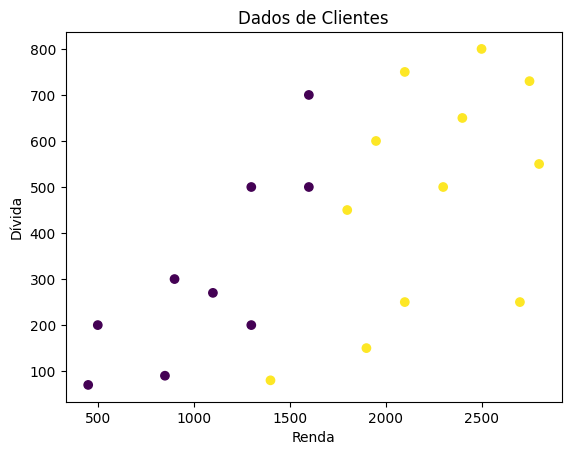

In [ ]:
# plotando o gráfico para verificação se as amostras são linearmente separáveis
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Dados de Clientes")
plt.xlabel('Renda')
plt.ylabel('Dívida')
plt.show()

In [ ]:
# Separar dados em treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print(X_train.shape)
print(y_train.shape)

(14, 2)
(14,)


In [ ]:
# Criar e treinar o modelo Perceptron
ppn = Perceptron(random_state=42, eta0=0.1, max_iter=100)
ppn.fit(X_train, y_train)

Perceptron(eta0=0.1, max_iter=100, random_state=42)

In [ ]:
# Avaliar o modelo nos dados de treino
y_train_pred = ppn.predict(X_train)
print("Acurácia nos dados de treino:", accuracy_score(y_train, y_train_pred))

# Avaliar o modelo nos dados de teste
y_test_pred = ppn.predict(X_test)
print("Acurácia nos dados de teste:", accuracy_score(y_test, y_test_pred))

# Relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_test_pred, target_names=['mau', 'bom']))

Acurácia nos dados de treino: 0.6428571428571429
Acurácia nos dados de teste: 0.42857142857142855

Relatório de Classificação:
              precision    recall  f1-score   support

         mau       0.00      0.00      0.00         4
         bom       0.43      1.00      0.60         3

    accuracy                           0.43         7
   macro avg       0.21      0.50      0.30         7
weighted avg       0.18      0.43      0.26         7



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


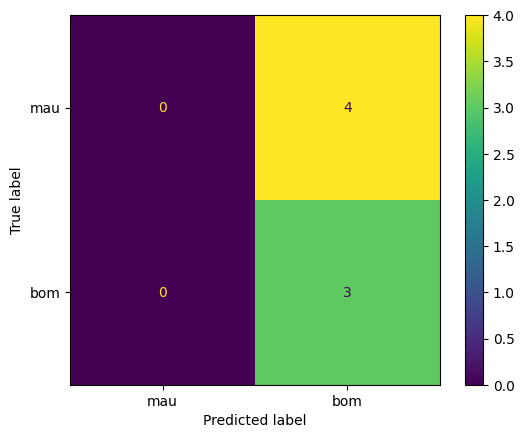

In [ ]:
# Apresentação gráfica da matriz de confusão dos testes classificados
conf_matrix = confusion_matrix(y_test, y_test_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['mau', 'bom'])
cm_display.plot()
plt.show()

In [ ]:
# Teste individual de amostras já normalizadas
print("\nNúmero de épocas no treinamento:", ppn.n_iter_)
print("Parâmetros finais do modelo:", ppn.get_params())

# Testar com novos exemplos
# Exemplo 1: Renda alta, dívida baixa (deve ser 'bom')
exemplo1 = np.array([[0.8, 0.1]])
# Exemplo 2: Renda baixa, dívida alta (deve ser 'mau')
exemplo2 = np.array([[0.2, 0.9]])

pred1 = ppn.predict(exemplo1)
pred2 = ppn.predict(exemplo2)

print("\nPrevisões para novos exemplos:")
print(f"Exemplo 1 (Renda alta, dívida baixa): {'bom' if pred1 == 1 else 'mau'}")
print(f"Exemplo 2 (Renda baixa, dívida alta): {'bom' if pred2 == 1 else 'mau'}")


Número de épocas no treinamento: 16
Parâmetros finais do modelo: {'alpha': 0.0001, 'class_weight': None, 'early_stopping': False, 'eta0': 0.1, 'fit_intercept': True, 'l1_ratio': 0.15, 'max_iter': 100, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': None, 'random_state': 42, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}

Previsões para novos exemplos:
Exemplo 1 (Renda alta, dívida baixa): bom
Exemplo 2 (Renda baixa, dívida alta): mau
